# Homework 2
## Clustering with PCA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.distance import cdist

In [3]:
def train_test_split(X, Y, N_train):
    np.random.seed(42)
    d, N = X.shape
    
    # Define the array of indices
    idx = np.arange(0, N)
    
    # Shuffle the indices
    np.random.shuffle(idx)
    
    # Extract train and test indices
    train_idx = idx[:N_train]
    test_idx = idx[N_train:]
    
    # Extract data
    X_train = X[:, train_idx]
    Y_train = Y[:, train_idx] 
    
    X_test = X[:, test_idx]
    Y_test = Y[:, test_idx]
    
    return X_train, Y_train, X_test, Y_test

In [4]:
def centroid(X, keepdims=True):
    return np.mean(X, axis=1, keepdims=keepdims)

In [5]:
def plot_confusion_matrix(y_test, y_pred, C1,C2,C3):
    confusion_matrix = np.zeros((3,3))
    y_test[y_test==C1],y_test[y_test==C2],y_test[y_test==C3] = 0,1,2
    y_pred[y_pred==C1],y_pred[y_pred==C2],y_pred[y_pred==C3] = 0,1,2
    y_test = y_test[0]
    for i in range(0,y_test.shape[0]):
        confusion_matrix[y_pred[i],y_test[i]] += 1
        
    n_c1 = np.sum(confusion_matrix[:,0])
    accuracy_c1 = round(confusion_matrix[0,0]/n_c1,2)
    n_c2 = np.sum(confusion_matrix[:,1])
    accuracy_c2 = round(confusion_matrix[1,1]/n_c2,2)
    n_c3 = np.sum(confusion_matrix[:,2])
    accuracy_c3 = round(confusion_matrix[2,2]/n_c3,2)
    print(f"Number of instances of class {C1}: {n_c1}, accuracy: {accuracy_c1*100}%")
    print(f"Number of instances of class {C2}: {n_c2}, accuracy: {accuracy_c2*100}%")
    print(f"Number of instances of class {C3}: {n_c3}, accuracy: {accuracy_c3*100}%")
    print("\nConfusion Matrix:")
    print(confusion_matrix)

In [6]:
def plot(k, Z, y, centroids, C1, C2, C3, title):
    
    if k == 2:
        plt.scatter(Z[0, y==C1], Z[1, y==C1], c='#FDE725', s=10, marker='o', label=f'class: {C1}')
        plt.scatter(Z[0, y==C2], Z[1, y==C2], c='#35B779', s=10, marker='o', label=f'class: {C2}')
        plt.scatter(Z[0, y==C3], Z[1, y==C3], c='#440154', s=10, marker='o', label=f'class: {C3}')
        plt.scatter(centroids[0, :], centroids[1, :], c='red', marker='X', s=50, label='Centroids')
        plt.title(title)
        plt.grid()
        plt.legend()
        plt.show()
        
    if k == 3:
        # Creating a 3D Subplot
        fig = plt.figure(figsize=(8, 6))
        ax = fig.add_subplot(projection='3d')
        # Visualize the point (project)
        ax.scatter(centroids[0, :], centroids[1, :], centroids[2, :], c='red', marker='X', s=50, label='Centroids')
        ax.scatter(Z[0, y==C1], Z[1, y==C1],Z[2, y==C1], c='#FDE725', s=10, marker='o', label=f'class: {C1}')
        ax.scatter(Z[0, y==C2], Z[1, y==C2],Z[2, y==C2], c='#35B779', s=10, marker='o', label=f'class: {C2}')
        ax.scatter(Z[0, y==C3], Z[1, y==C3],Z[2, y==C3], c='#440154', s=10, marker='o', label=f'class: {C3}')
        ax.set_title(title)
        plt.grid()
        plt.legend()
        plt.show()
        

In [7]:
def denormalize(y_pred, C1,C2,C3):
    y_denormalized = y_pred.copy()
    for i in range(y_pred.shape[0]):
        if y_denormalized[i] == 0:
            y_denormalized[i] = C1
        elif y_denormalized[i] == 1:
            y_denormalized[i] = C2
        elif y_denormalized[i] == 2:
            y_denormalized[i] = C3
        else:
             raise Exception("There was a problem with the prediction. None of the given classes corresponded to the predicted label ")
    return y_denormalized


In [8]:
def classify(data_array, C1,C2,C3, k):
    X, y = data_array[1:,:], data_array[:1, :]
    X.shape, y.shape

    idx = (y[0] == C1) | (y[0] == C2) | (y[0] == C3)
    X = X[:, idx]
    y = y[:, idx]

    N_train = int(0.8 * y.shape[1])
    X_train, y_train, X_test, y_test = train_test_split(X, y, N_train)
    CX = centroid(X_train)
    Xc = X_train - CX

    U, s, VT = np.linalg.svd(Xc, full_matrices = False) # it is a huge dataset, not compute it in full
    U_k = U[:, :k]

    Z_k = U_k.T @ Xc
    print(f"Shape of Z_k: {Z_k.shape}.")

    centroids = np.array([centroid(Z_k[:, y_train[0]==c], keepdims=False) for c in [C1,C2,C3]]).T
    
    plot(k, Z_k, y_train[0], centroids, C1, C2, C3, "Training data, their classes and centroids")
    
    # here i compute the distances with cdist function, that computes distances between 
    # every point of the cluster Z_k and the respective centroids
    dist_1 = cdist(Z_k[:, y_train[0]==C1].T, centroids[:,0:1].T, metric='euclidean')
    dist_2 = cdist(Z_k[:, y_train[0]==C2].T, centroids[:,1:2].T, metric='euclidean')
    dist_3 = cdist(Z_k[:, y_train[0]==C3].T, centroids[:,2:3].T, metric='euclidean')

    avg_dist_1 = np.mean(dist_1, axis=0)[0]
    avg_dist_2 = np.mean(dist_2, axis=0)[0]
    avg_dist_3 = np.mean(dist_3, axis=0)[0]
    print("Results for TRAIN data")
    print(f"average distance from centroid of class {C1}: {round(avg_dist_1,2)}")
    print(f"average distance from centroid of class {C2}: {round(avg_dist_2,2)}")
    print(f"average distance from centroid of class {C3}: {round(avg_dist_3,2)}")

    CX_test = centroid(X_test)
    Xc_test = X_test - CX_test

    # Note: U_k is not recomputed, is the same of the train. 
    Z_k_test = U_k.T @ Xc_test
    print(f"Shape of Z_k: {Z_k_test.shape}.")
    
    plot(k, Z_k_test, y_test[0], centroids, C1, C2, C3, "Test data with true classes")

    # here i compute the distances with cdist, that computes distances between 
    # every point of the cluster Z_k and the respective centroids
    dist_1_test = cdist(Z_k_test[:, y_test[0]==C1].T, centroids[:,0:1].T, metric='euclidean')
    dist_2_test = cdist(Z_k_test[:, y_test[0]==C2].T, centroids[:,1:2].T, metric='euclidean')
    dist_3_test = cdist(Z_k_test[:, y_test[0]==C3].T, centroids[:,2:3].T, metric='euclidean')

    avg_dist_1_test = np.mean(dist_1_test, axis=0)[0]
    avg_dist_2_test = np.mean(dist_2_test, axis=0)[0]
    avg_dist_3_test = np.mean(dist_3_test, axis=0)[0]
    print("Results for TEST data")
    print(f"average distance from centroid of class {C1}: {round(avg_dist_1_test,2)}")
    print(f"average distance from centroid of class {C2}: {round(avg_dist_2_test,2)}")
    print(f"average distance from centroid of class {C3}: {round(avg_dist_3_test,2)}")

    # computing the distance between each datapoint and the three centroids
    distances_matrix = cdist(Z_k_test.T, centroids.T, metric='euclidean')
    
    # np.argmin returns the index of the column (axis=1) with the minimum distance
    y_pred = np.argmin(distances_matrix, axis=1)
    y_pred = denormalize(y_pred,C1,C2,C3)
    # y_pred is now a vector containing the predicted labels
    
    plot(k, Z_k_test, y_pred, centroids, C1, C2, C3, "Test data classified according to the distance from the nearest centroid")

    correct_guess = np.sum(y_test==y_pred)
    accuracy_score = correct_guess/y_test.shape[1]
    print(f"The accuracy of this classification algorithm over the whole testset is {round(accuracy_score*100,2)}%. k = {k}")

    plot_confusion_matrix(y_test, y_pred, C1,C2,C3)

In [9]:
def plot_accuracy_k(C1,C2,C3,ks):
    X, y = data_array[1:,:], data_array[:1, :]

    idx = (y[0] == C1) | (y[0] == C2) | (y[0] == C3)
    X = X[:, idx]
    y = y[:, idx]

    N_train = int(0.8 * y.shape[1])
    X_train, y_train, X_test, y_test = train_test_split(X, y, N_train)

    CX = centroid(X_train)
    Xc = X_train - CX
    accuracies = np.zeros(ks.shape)
    U, s, VT = np.linalg.svd(Xc, full_matrices = False) # it is a huge dataset, not compute it in full    

    for i,k in enumerate(ks):
        U_k = U[:, :k]
        Z_k = U_k.T @ Xc 

        centroids = np.array([centroid(Z_k[:, y_train[0]==c], keepdims=False) for c in [C1,C2,C3]]).T
        centroids.shape

        CX_test = centroid(X_test)
        Xc_test = X_test - CX_test
        Z_k_test = U_k.T @ Xc_test

        distances_matrix = cdist(Z_k_test.T, centroids.T, metric='euclidean')
        y_pred = np.argmin(distances_matrix, axis=1)
        y_pred = denormalize(y_pred,C1,C2,C3)

        correct_guess = np.sum(y_test==y_pred)
        accuracy_score = (correct_guess/y_test.shape[1])*100
        accuracies[i] = accuracy_score
        
    plt.figure(figsize=(10,4))
    plt.plot(ks, accuracies)
    plt.grid()
    plt.title(f"Accuracies of the classification algorithm for the digits {C1},{C2},{C3} by varying k")
    plt.xlabel("k")
    plt.ylabel("Accuracy score")
    plt.show()

## Clustering with PCA

The task for this exercise is to verify the ability of PCA in clustering data by projecting very high-dimensional
datapoints to 2 or 3 dimensions. In particular, consider the dataset MNIST provided on Virtuale. This
dataset contains images of handwritten digits with dimension 28 × 28, together with a number from 0 to 9
representing the label. You are asked to:  
- Load the dataset in memory and explore its head and shape to understand how the informations are placed inside of it;


In [10]:
df = pd.read_csv('./dataset/mnist-data.csv')
display(df.head())

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Split the dataset into the X matrix of dimension d × N, with d = 784 being the dimension of each
datum, N is the number of datapoints, and Y ∈ R
N containing the corresponding labels;

In [11]:
data_array= df.to_numpy()
data_array = data_array.T

In [12]:
X, y = data_array[1:,:], data_array[:1, :]
X.shape, y.shape

((784, 42000), (1, 42000))

Choose a number of digits (for example, 0, 6 and 9) and extract from X and Y the sub-dataset
containing only the considered digits. Re-call X and Y those datasets, since the originals are not
required anymore;  
Set Ntrain < N and randomly sample a training set with Ntrain datapoints from X (and the corresponding Y ). Call them Xtrain and Ytrain. Everything else is the test set. Call it Xtest and
Ytest.

In [13]:
C1,C2,C3 = (0,6,9)
idx = (y[0] == C1) | (y[0] == C2) | (y[0] == C3)
X = X[:, idx]
y = y[:, idx]

N_train = int(0.8 * y.shape[1])
X_train, y_train, X_test, y_test = train_test_split(X, y, N_train)

print(f'Train dataset dimension: {y_train.shape[1]} samples')
print(f'Test dataset dimension: {y_test.shape[1]} samples')

Train dataset dimension: 9965 samples
Test dataset dimension: 2492 samples


In [14]:
CX = centroid(X_train)
Xc = X_train - CX

print(f"centroid of Xc is: {np.linalg.norm(centroid(Xc))}.")

centroid of Xc is: 1.2539061157365605e-12.


Implement the algorithms computing the PCA of Xtrain with a fixed k. Visualize the results (for
**k = 2**) and the position of the centroid of each cluster;

## PCA
PCA implements dimensionality reduction through the use of truncated SVD.  
Our objective is to extract only $k<d$ valuable features from our dataset, in order to also be able to visualize it. Since the relevant information of a matrix are compressed in the first singular vector and their corresponding singular values, we can compute a matrix with reduced dimension as the product between the truncated left singular matrix and the matrix itself!  
$Z = U_{k}^T*X_{k}$

In [15]:
k = 2

U, s, VT = np.linalg.svd(Xc, full_matrices = False) # it is a huge dataset, not compute it in full
U_k = U[:, :k]

Z_k = U_k.T @ Xc
print(f"Shape of Z_k: {Z_k.shape}.")

Shape of Z_k: (2, 9965).


In [16]:
# i build a matrix centroid containing the coordinate of the three centroids
centroids = np.array([centroid(Z_k[:, y_train[0]==c], keepdims=False) for c in [C1,C2,C3]]).T
centroids.shape

(2, 3)

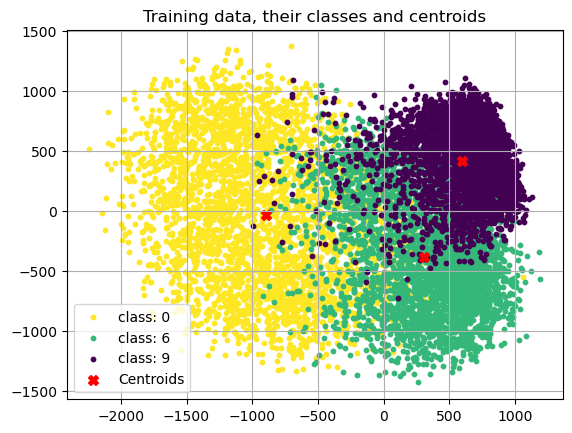

In [17]:
plot(k, Z_k, y_train[0], centroids, C1, C2, C3, "Training data, their classes and centroids")

Compute, for each cluster, the average distance from the centroid. Comment the result;

In [18]:
# here i compute the distances with cdist function, that computes distances between 
# every point of the cluster Z_k and the respective centroids
dist_1 = cdist(Z_k[:, y_train[0]==C1].T, centroids[:,0:1].T, metric='euclidean')
dist_2 = cdist(Z_k[:, y_train[0]==C2].T, centroids[:,1:2].T, metric='euclidean')
dist_3 = cdist(Z_k[:, y_train[0]==C3].T, centroids[:,2:3].T, metric='euclidean')

In [19]:
avg_dist_1 = np.mean(dist_1, axis=0)[0]
avg_dist_2 = np.mean(dist_2, axis=0)[0]
avg_dist_3 = np.mean(dist_3, axis=0)[0]
print("Results for TRAIN data")
print(f"average distance from centroid of class {C1}: {round(avg_dist_1,2)}")
print(f"average distance from centroid of class {C2}: {round(avg_dist_2,2)}")
print(f"average distance from centroid of class {C3}: {round(avg_dist_3,2)}")

Results for TRAIN data
average distance from centroid of class 0: 732.26
average distance from centroid of class 6: 538.92
average distance from centroid of class 9: 367.72


Compute, for each cluster, the average distance from the centroid on the **test set**. Comment the results;  
`NB:` the centroids must be the same as the train!

In [20]:
CX_test = centroid(X_test)
Xc_test = X_test - CX_test

In [21]:
# Note: U_k is not recomputed, is the same of the train. 
Z_k_test = U_k.T @ Xc_test
print(f"Shape of Z_k: {Z_k_test.shape}.")

Shape of Z_k: (2, 2492).


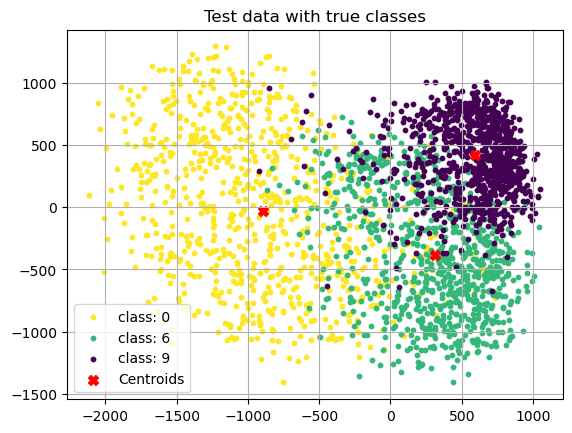

In [22]:
plot(k, Z_k_test, y_test[0], centroids, C1, C2, C3, "Test data with true classes")

In [23]:
# here i compute the distances with cdist, that computes distances between 
# every point of the cluster Z_k and the respective centroids
dist_1_test = cdist(Z_k_test[:, y_test[0]==C1].T, centroids[:,0:1].T, metric='euclidean')
dist_2_test = cdist(Z_k_test[:, y_test[0]==C2].T, centroids[:,1:2].T, metric='euclidean')
dist_3_test = cdist(Z_k_test[:, y_test[0]==C3].T, centroids[:,2:3].T, metric='euclidean')

avg_dist_1_test = np.mean(dist_1_test, axis=0)[0]
avg_dist_2_test = np.mean(dist_2_test, axis=0)[0]
avg_dist_3_test = np.mean(dist_3_test, axis=0)[0]
print("Results for TEST data")
print(f"average distance from centroid of class {C1}: {round(avg_dist_1_test,2)}")
print(f"average distance from centroid of class {C2}: {round(avg_dist_2_test,2)}")
print(f"average distance from centroid of class {C3}: {round(avg_dist_3_test,2)}")

Results for TEST data
average distance from centroid of class 0: 755.94
average distance from centroid of class 6: 544.8
average distance from centroid of class 9: 361.87


### Define a classification algorithm in this way: 
given a new observation x, compute the distance between
x and each cluster centroid. Assign x to the class corresponding the the closer centroid. Compute the
accuracy of this algorithm on the test set and compute its accuracy;

In [24]:
# computing the distance between each datapoint and the three centroids
distances_matrix = cdist(Z_k_test.T, centroids.T, metric='euclidean')
print(f"Computing the pair-wise distance between each datapoint of the dataset and each centroid, obtaining a {distances_matrix.shape[0]}x{distances_matrix.shape[1]} matrix.")
print(f"\nI reduce this matrix as a single array by selecting the lowest value for each row, representing the least distance. \nThe index will identify the class of belonging.")
# np.argmin returns the index of the column (axis=1) with the minimum distance
y_pred = np.argmin(distances_matrix, axis=1)
y_pred = denormalize(y_pred,C1,C2,C3)
# y_pred is now a vector containing the predicted labels

Computing the pair-wise distance between each datapoint of the dataset and each centroid, obtaining a 2492x3 matrix.

I reduce this matrix as a single array by selecting the lowest value for each row, representing the least distance. 
The index will identify the class of belonging.


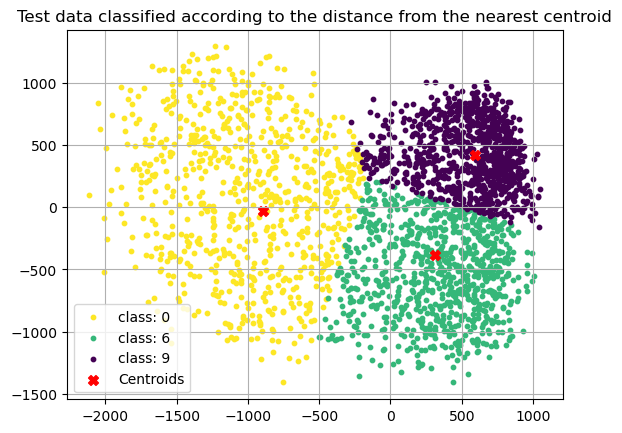

In [25]:
plot(k, Z_k_test, y_pred, centroids, C1, C2, C3, "Test data classified according to the distance from the nearest centroid")

In [27]:
correct_guess = np.sum(y_test==y_pred)
accuracy_score = correct_guess/y_test.shape[1]
print(f"The accuracy of this classification algorithm over the whole testset is {round(accuracy_score*100,2)}%. k = {2}")

The accuracy of this classification algorithm over the whole testset is 83.51%. k = 2


In [28]:
plot_confusion_matrix(y_test, y_pred, C1,C2,C3)

Number of instances of class 0: 786.0, accuracy: 84.0%
Number of instances of class 6: 839.0, accuracy: 77.0%
Number of instances of class 9: 867.0, accuracy: 89.0%

Confusion Matrix:
[[663.  79.  17.]
 [115. 643.  75.]
 [  8. 117. 775.]]


Shape of Z_k: (3, 9965).


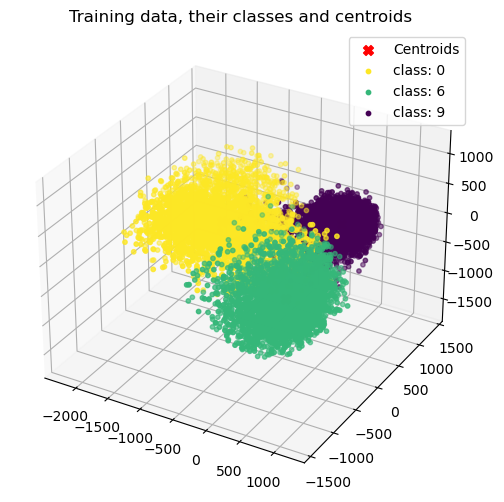

Results for TRAIN data
average distance from centroid of class 0: 849.46
average distance from centroid of class 6: 697.79
average distance from centroid of class 9: 485.49
Shape of Z_k: (3, 2492).


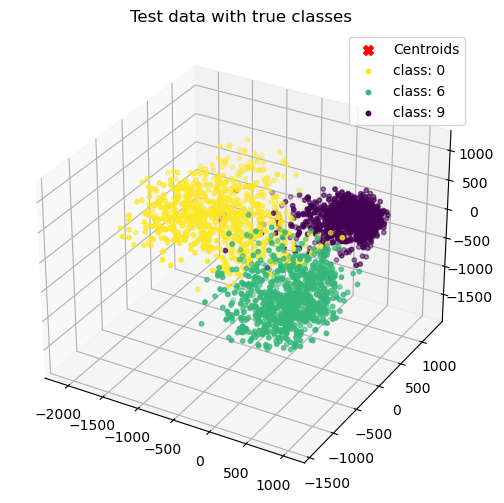

Results for TEST data
average distance from centroid of class 0: 865.92
average distance from centroid of class 6: 713.25
average distance from centroid of class 9: 476.34


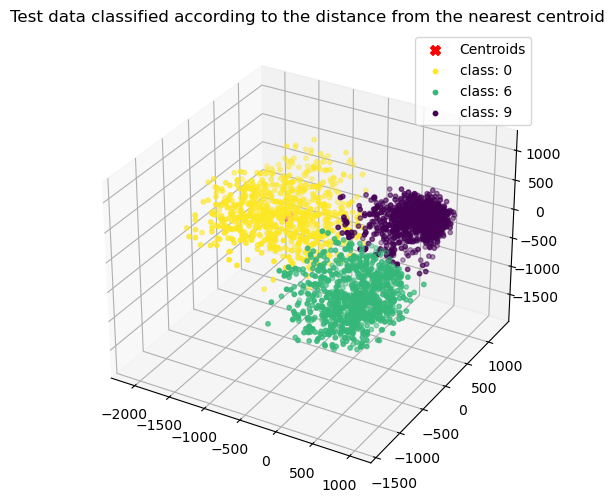

The accuracy of this classification algorithm over the whole testset is 93.14%. k = 3
Number of instances of class 0: 786.0, accuracy: 90.0%
Number of instances of class 6: 839.0, accuracy: 93.0%
Number of instances of class 9: 867.0, accuracy: 96.0%

Confusion Matrix:
[[705.  26.  19.]
 [ 62. 782.  14.]
 [ 19.  31. 834.]]


In [29]:
C1,C2,C3,k = 0,6,9,3
classify(data_array,C1,C2,C3,k)

## Let's see a very bad setting for classification

Shape of Z_k: (2, 9767).


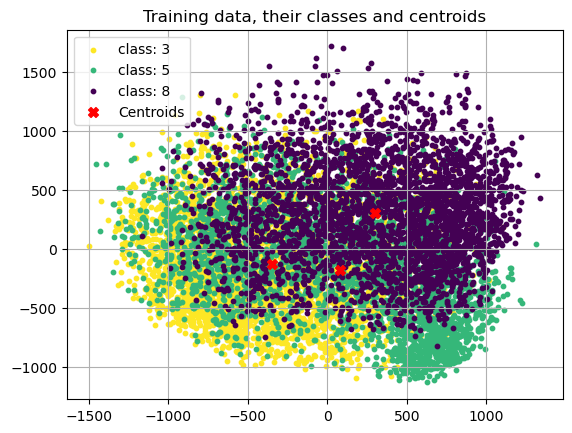

Results for TRAIN data
average distance from centroid of class 3: 590.04
average distance from centroid of class 5: 700.32
average distance from centroid of class 8: 607.93
Shape of Z_k: (2, 2442).


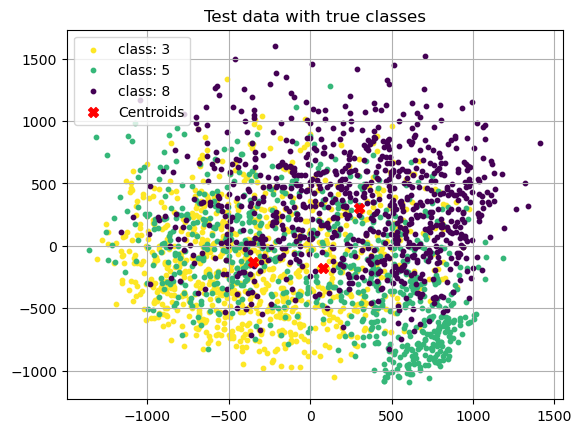

Results for TEST data
average distance from centroid of class 3: 579.06
average distance from centroid of class 5: 701.26
average distance from centroid of class 8: 608.67


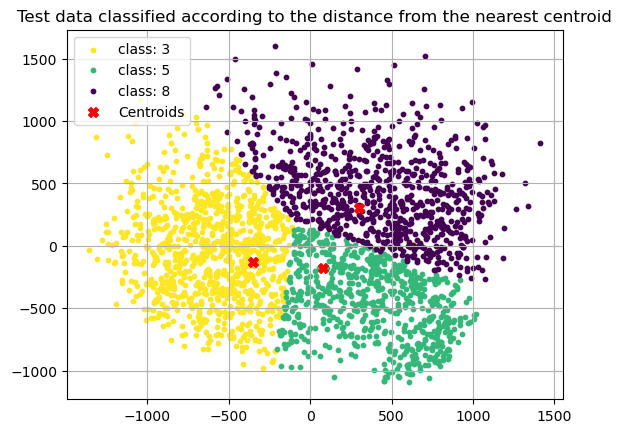

The accuracy of this classification algorithm over the whole testset is 58.48%. k = 2
Number of instances of class 3: 879.0, accuracy: 62.0%
Number of instances of class 5: 755.0, accuracy: 46.0%
Number of instances of class 8: 808.0, accuracy: 66.0%

Confusion Matrix:
[[547. 271. 147.]
 [207. 344. 124.]
 [125. 140. 537.]]


In [32]:
C1,C2,C3,k = 3,5,8,2
classify(data_array,C1,C2,C3,k)

Does the accuracy increase for k = 3?

Shape of Z_k: (3, 9767).


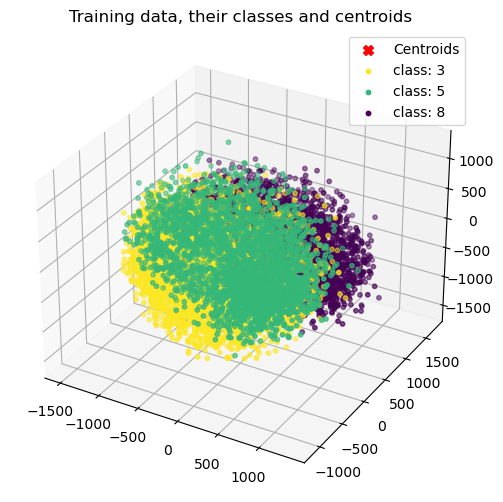

Results for TRAIN data
average distance from centroid of class 3: 791.69
average distance from centroid of class 5: 830.41
average distance from centroid of class 8: 716.59
Shape of Z_k: (3, 2442).


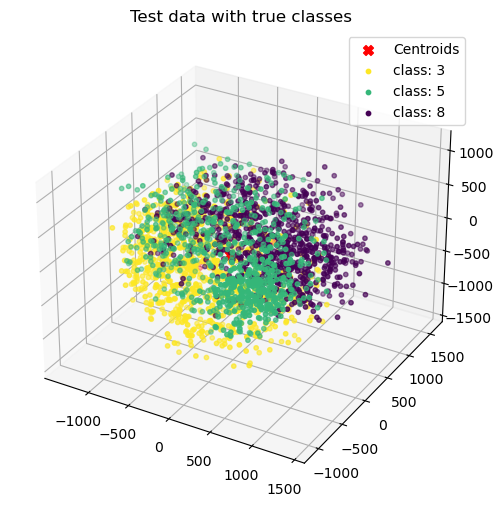

Results for TEST data
average distance from centroid of class 3: 774.64
average distance from centroid of class 5: 834.0
average distance from centroid of class 8: 711.14


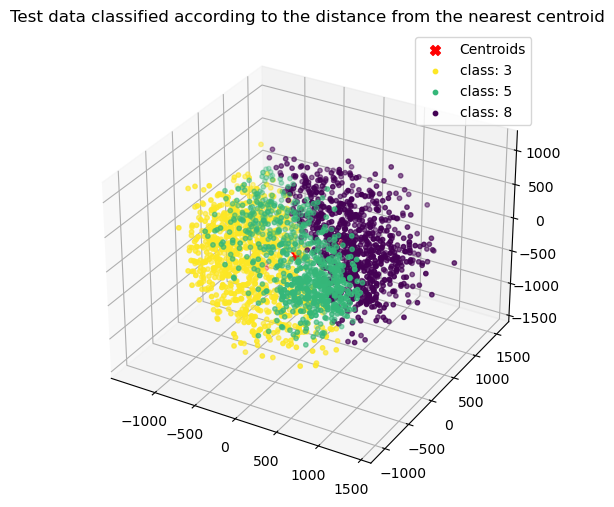

The accuracy of this classification algorithm over the whole testset is 60.73%. k = 3
Number of instances of class 3: 879.0, accuracy: 66.0%
Number of instances of class 5: 755.0, accuracy: 48.0%
Number of instances of class 8: 808.0, accuracy: 68.0%

Confusion Matrix:
[[578. 253.  91.]
 [191. 359. 171.]
 [110. 143. 546.]]


In [33]:
C1,C2,C3,k = 3,5,8,3
classify(data_array,C1,C2,C3,k)

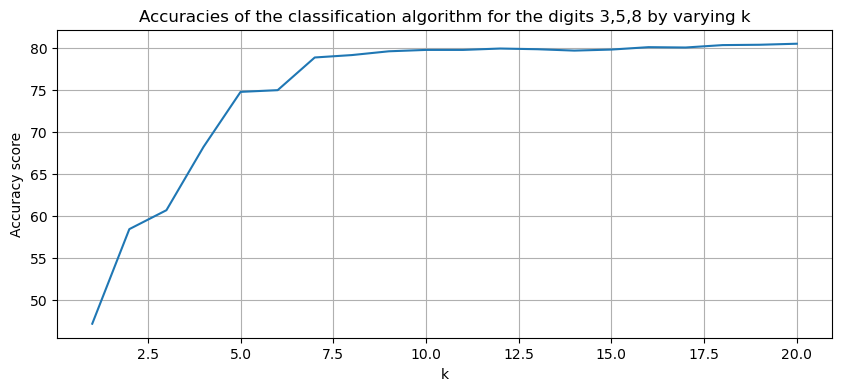

In [35]:
C1, C2, C3 = (3,5,8)
ks = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
plot_accuracy_k(C1,C2,C3,ks)

### Repeat this experiment for different values of k and different digits. What do you observe?

Shape of Z_k: (2, 10525).


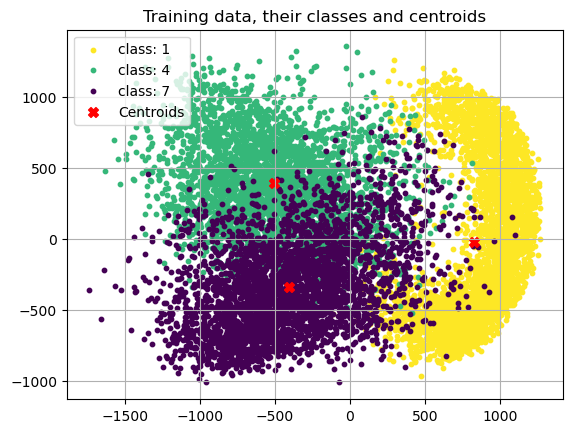

Results for TRAIN data
average distance from centroid of class 1: 561.61
average distance from centroid of class 4: 447.35
average distance from centroid of class 7: 466.93
Shape of Z_k: (2, 2632).


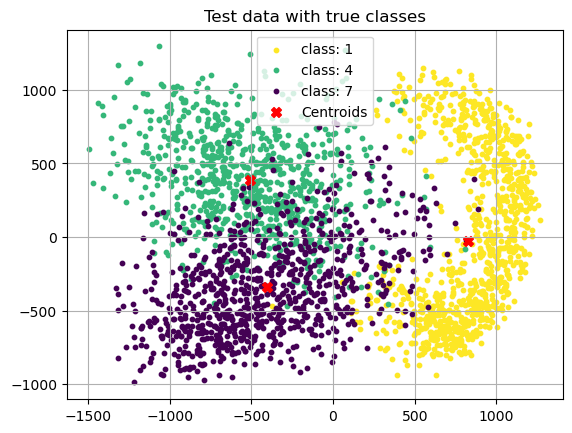

Results for TEST data
average distance from centroid of class 1: 559.75
average distance from centroid of class 4: 447.96
average distance from centroid of class 7: 477.31


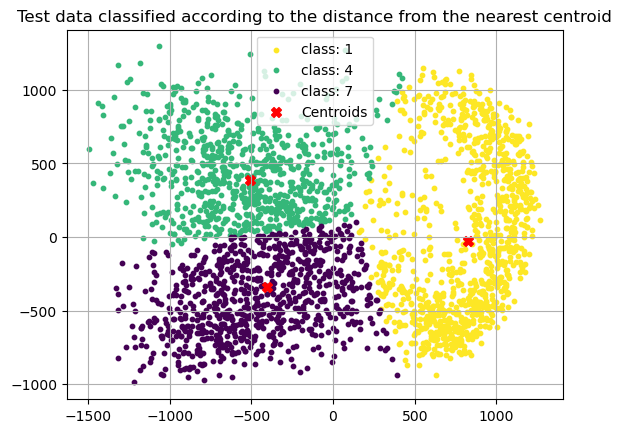

The accuracy of this classification algorithm over the whole testset is 87.84%. k = 2
Number of instances of class 1: 948.0, accuracy: 96.0%
Number of instances of class 4: 804.0, accuracy: 85.0%
Number of instances of class 7: 880.0, accuracy: 82.0%

Confusion Matrix:
[[911.  24.  75.]
 [  8. 683.  87.]
 [ 29.  97. 718.]]


In [30]:
C1,C2,C3,k = 1,4,7,2
classify(data_array,C1,C2,C3,k)

## Computing accuracies w.r.t k

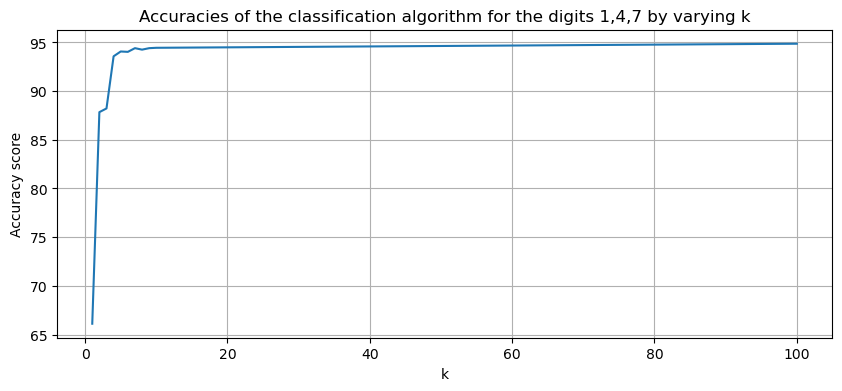

In [31]:
C1, C2, C3 = (1,4,7)
ks = np.array([1,2,3,4,5,6,7,8,9,10,100])
plot_accuracy_k(C1,C2,C3,ks)